In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Loading and preparing the heart disease data set

#### Link to the dataset: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

In [2]:
df = pd.read_csv("C:/Users/kater/Downloads/heart.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Checking for NaN values and checking if the datetypes are suitable for fuethwe research

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Check for outliers in the data

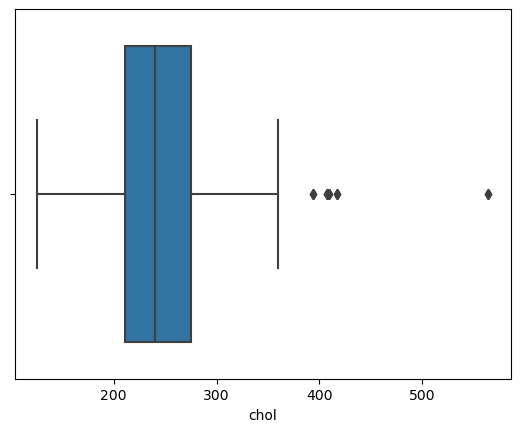

In [4]:
sns.boxplot(data=df, x="chol")
plt.show()

#### Defining lower and upper outliers using interquartile range (IQR):
Der Interquartilsabstand mit IQR (nach der englischen Bezeichnung interquartile range)abgekürzt, ist ein Streuungsmaß in der deskriptiven Statistik. Sortiert man eine Stichprobe der Größe nach, so gibt der Interquartilsabstand an, wie breit das Intervall ist, in dem die mittleren 50 % der Stichprobeelemente liegen (Quelle: https://de.wikipedia.org/wiki/Interquartilsabstand_(deskriptive_Statistik))

In [5]:
def get_outliers(columnname):
    #75 percentile in cholesterol column
    seventy_fifth = df[columnname].quantile(0.75)
    #25 percentile in cholesterol column
    twenty_fifth = df[columnname].quantile(0.25)
    #iqr
    iqr = seventy_fifth - twenty_fifth
    
    # upper threshhold for an cholesterol outlier
    upper = seventy_fifth + (1.5 * iqr)
    # lower threshhold for an cholesterol outlier
    lower = twenty_fifth - (1.5 * iqr)

    return lower, upper


In [6]:
print(get_outliers("chol"))

(115.0, 371.0)


In [7]:
# print out all the outlier data
lower = get_outliers("chol")[0]
upper = get_outliers("chol")[1]
df[(df["chol"] < lower) | (df["chol"] > upper)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


#### Result: the outliers are not anomalous or faulty (like print errors or so), so we do not have to delete them from dataset or replace them with mean or median. 

### Deviding dataset into two populations: diagnosed and healthy patients

In [8]:
patients_with_no_diagnose = df[~df["target"].isin([1])]
patients_with_no_diagnose.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


In [9]:
diagnosed_patients = df[df["target"].isin([1])]
diagnosed_patients.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1


## 2. Defining the significance level and hypotheses

##### significance level = alpha = 0.05
##### H0 = The mean cholesterol is the same for those who have been diagnosed and those, who have not
##### Ha = The mean cholesterol is greater for those, who diagnosed compared to those, who have not

In [10]:
#first, calculate mean for both populations
chol_mean_diagnosed_patients = diagnosed_patients["chol"].mean()
chol_mean_healthy_patients = patients_with_no_diagnose["chol"].mean()
print(chol_mean_diagnosed_patients, "\n", 
      chol_mean_healthy_patients)

240.97908745247148 
 251.2925851703407


In [11]:
#calculate STD for both populations
chol_std_diagnosed_patients = diagnosed_patients["chol"].std()
chol_std_healthy_patients = patients_with_no_diagnose["chol"].std()
print(chol_std_diagnosed_patients, chol_std_healthy_patients)

53.010345260991095 49.55892364429828


In [12]:
#number of patients in each group
n_diagnosed_patients = diagnosed_patients["chol"].count()
n_healthy_patients = patients_with_no_diagnose["chol"].count()
print(n_diagnosed_patients, n_healthy_patients)

526 499


In [13]:
# when comparing two populations z_score is named t_score or t_statistic
numerator = chol_mean_diagnosed_patients - chol_mean_healthy_patients
denominator = np.sqrt(chol_std_diagnosed_patients ** 2 
                      / n_diagnosed_patients + chol_std_healthy_patients ** 2 
                      / n_healthy_patients)
t_stat = numerator / denominator
print(f"T-statistic: {t_stat}")

T-statistic: -3.2191339182725356


##### As we have calculated t-score, we have to calculate a p-score out of it

In [14]:
degrees_of_freedom = n_diagnosed_patients + n_healthy_patients -2
from scipy.stats import t
p_value = 1 - t.cdf(t_stat, df = degrees_of_freedom) # One should use t-distribution-CDF, not a normal CDF
p_value

0.9993368838319615

## Copmaring the p-value to significance level and making a conclusion

In [15]:
p_value <= 0.05 # 0.05 is a significance level

False

##### Conclusion: P_value is not smaller than a significance level, so we fail to reject H0 (null hypothesis). So H0 holds true, meaning the mean cholesterol is the same (not significantly different) for those who have been diagnosed and those, who have not